<a href="https://colab.research.google.com/github/joheras/MusicaCatedralStoDomingoIER/blob/main/Notebooks/SacarM%C3%BAsica/TutorialImportante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial
#### Vamos a hacer una breve explicación de como reproducir la música de una imagen anotada

Tenemos dos modelos:
- Un lector de pentagramas
- Un detector de objetos en obras

## Librerías y funciones

In [40]:
#import shutil
#shutil.make_archive('Musica', 'zip', '/content/Musica')

'/content/Musica.zip'

In [4]:
%%capture
!pip install icevision[all]

In [5]:
from icevision.all import *

In [36]:
def abrirImagen(path):
  return cv2.imread(str(path))

def imagenDeImagen(img,h=16,w=16):
  plt.figure(figsize = (h,w))
  plt.imshow(img)
  plt.show()

def mostrarImagen(path):
  img=cv2.imread(str(path))
  imagenDeImagen(img)
  return abrirImagen(img)


def imgAnotada(path):
  colores = {'claved':(119, 90, 17), 'claves':(119, 90, 17), 'clavef':(119, 90, 17), 'nota1:8':(150,255,209), 'nota1':(150,255,209), 'nota2':(150,255,209), 'nota4':(150,255,209), 'nota1:2':(150,255,209), 'nota1:4':(150,255,209), 'notae':(150,255,209), 'sos':(242,170,255), 'bem':(242,170,255), 'cal':(242,170,255), 'bec':(242,170,255), 'sil0':(159,142,243), 'sil1':(159,142,243), 'sil2':(159,142,243), 'sil1:2':(159,142,243), 'sil1:4':(159,142,243), '2x4':(173,76,0), '3x4':(173,76,0), '3x2':(173,76,0), '4x4':(173,76,0), '6x8':(173,76,0), 'punt':(0,255,0), 'liga':(40,47,153),'3':(255,0,0),'P2':(255,0,0), 'P1':(255,0,0), 'mf':(255,0,0), 'check':(240,0,35),'line':(119,189,255),'other':(35,99,33)}
  img = cv2.imread(str(path))
  n=path.stem+'.json'
  anotacion= json.loads(open(str(path.parent.parent/'annotations'/n)).read())
  for elemento in anotacion:
    x, y, z, w=elemento["box"]
    cv2.rectangle(img, (x, y), (z,w), colores[elemento["label"]], 1)
  return img

def imgEscrita(path):
  colores = {'claved':(119, 90, 17), 'claves':(119, 90, 17), 'clavef':(119, 90, 17), 'nota1:8':(150,255,209), 'nota1':(150,255,209), 'nota2':(150,255,209), 'nota4':(150,255,209), 'nota1:2':(150,255,209), 'nota1:4':(150,255,209), 'notae':(150,255,209), 'sos':(242,170,255), 'bem':(242,170,255), 'cal':(242,170,255), 'bec':(242,170,255), 'sil0':(159,142,243), 'sil1':(159,142,243), 'sil2':(159,142,243), 'sil1:2':(159,142,243), 'sil1:4':(159,142,243), '2x4':(173,76,0), '3x4':(173,76,0), '3x2':(173,76,0), '4x4':(173,76,0), '6x8':(173,76,0), 'punt':(0,255,0), 'liga':(40,47,153),'3':(255,0,0),'P2':(255,0,0), 'P1':(255,0,0), 'mf':(255,0,0), 'check':(240,0,35),'line':(119,189,255),'other':(35,99,33)}
  img = cv2.imread(str(path))
  img = imgAnotada(path)
  n=path.stem+'.json'
  anotacion= json.loads(open(str(path.parent.parent/'annotations'/n)).read())
  for elemento in anotacion:
    x, y, z, w=elemento["box"]
    cv2.putText(img, elemento["label"], (int(x+(z-x)/2), w+10), cv2.FONT_HERSHEY_TRIPLEX,0.35, colores[elemento["label"]], 1)
  return img

def pintarPredicciones(num):
  for f in files[0:num]:
    clone=imgAnotada(f)
    txt_pred=open('input/detection-results/'+f.stem+'.txt')
    linea_pred=txt_pred.readline() 
    while linea_pred!='':
      logit,conf,x1,y1,z1,w1=linea_pred.split()
      linea_pred=txt_pred.readline()
      cv2.rectangle(clone, (int(x1), int(y1)), (int(z1),int(w1)), (255, 0, 0), 2)
    imagenDeImagen(clone,31,10)

## Mostrando obras y pentagramas anotados

In [2]:
%%capture
!unzip Musica.zip

### Pentagrama
De momento tenemos dos tipos

In [12]:
files = get_files('/content/Musica/pents', folders = ['images'])

- Los de Santodomingo

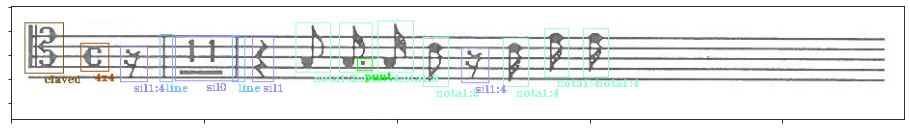

In [37]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(imgEscrita(files[0]),cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

- Los de una partitura de Mario Bros

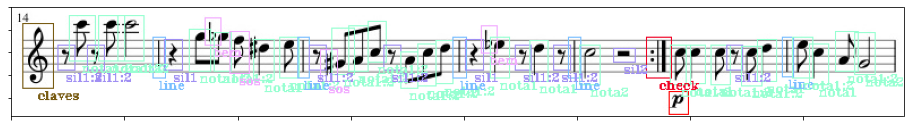

In [38]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(imgEscrita(files[87]),cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

### Obra